I. EXPLORATORY DATA ANALYSIS

1. Khám Phá Dữ Liệu Tổng Quan

Đọc và kiểm tra file captions.txt

In [1]:
import pandas as pd
import os

# Đường dẫn đến file captions.txt
captions_path = 'Dataset/captions.txt'

# Đọc file captions.txt (giả sử định dạng là: image.jpg caption)
captions_df = pd.read_csv(captions_path, delimiter=',', names=['image', 'caption'])

# Xem kích thước dữ liệu
print("Số lượng ảnh và chú thích trong file captions.txt:")
print(captions_df.shape)

# Hiển thị vài mẫu dữ liệu ngẫu nhiên
print("\nMột vài mẫu dữ liệu:")
print(captions_df.sample(5))

# Kiểm tra định dạng dữ liệu
print("\nKiểm tra các giá trị null trong dữ liệu:")
print(captions_df.isnull().sum())


Số lượng ảnh và chú thích trong file captions.txt:
(40456, 2)

Một vài mẫu dữ liệu:
                           image  \
17357  2942094037_f6b36fd3db.jpg   
7750   2328616978_fb21be2b87.jpg   
30547  3530687486_6e6be53602.jpg   
24742  3296124052_6f1d1c9f8d.jpg   
18504  3016200560_5bf8a70797.jpg   

                                                 caption  
17357  A little girl is bouncing on a colorful inflat...  
7750   A woman wearing a cowboy hat and carrying lugg...  
30547         A woman blowing on a milkweed in a field .  
24742  A man in a black shirt and jeans is backing aw...  
18504             A white dog is running over a bridge .  

Kiểm tra các giá trị null trong dữ liệu:
image      0
caption    0
dtype: int64


Kiểm tra số lượng ảnh thực tế trong thư mục Flicker8k_Dataset

In [2]:
# Đường dẫn đến thư mục chứa ảnh
images_path = 'Dataset/Flicker8k_Dataset'

# Đếm số lượng ảnh trong thư mục
image_files = [file for file in os.listdir(images_path) if file.endswith('.jpg')]
print("\nSố lượng ảnh trong thư mục Flicker8k_Dataset:")
print(len(image_files))

# Đảm bảo tất cả các ảnh trong captions.txt tồn tại trong thư mục ảnh
missing_images = captions_df['image'].apply(lambda x: x not in image_files).sum()
print("\nSố lượng ảnh bị thiếu trong thư mục so với file captions.txt:")
print(missing_images)



Số lượng ảnh trong thư mục Flicker8k_Dataset:
8091

Số lượng ảnh bị thiếu trong thư mục so với file captions.txt:
1


Hiển thị ảnh ngẫu nhiên và chú thích kèm theo (3 ảnh)

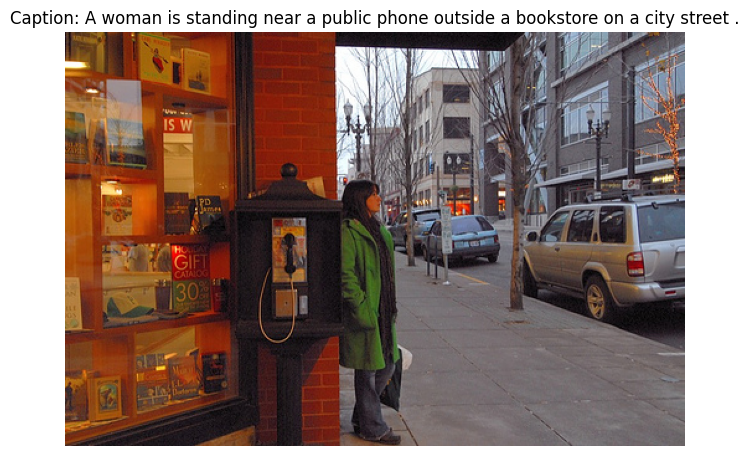

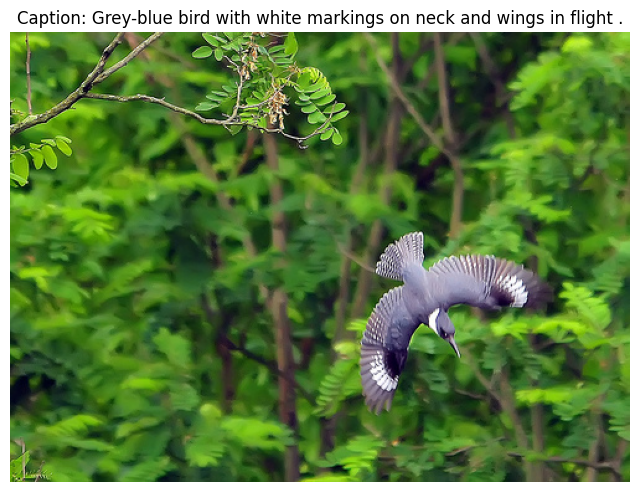

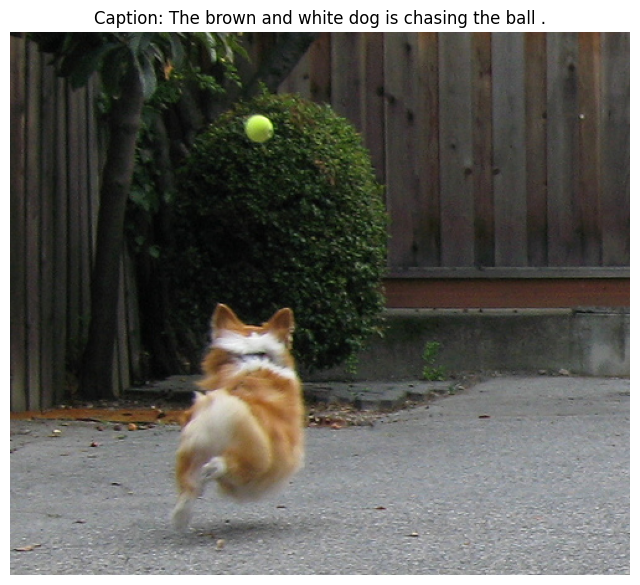

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Chọn ngẫu nhiên 3 mẫu dữ liệu
sample_data = captions_df.sample(3)

# Hiển thị ảnh và chú thích
for index, row in sample_data.iterrows():
    img_path = os.path.join(images_path, row['image'])
    img = mpimg.imread(img_path)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(f"Caption: {row['caption']}")
    plt.axis('off')
    plt.show()


Kiểm tra định dạng và cấu trúc

In [5]:
# Kiểm tra định dạng của các ảnh (kích thước và kiểu)
import cv2

sample_image_path = os.path.join(images_path, captions_df['image'].iloc[0])
image = cv2.imread(sample_image_path)

if image is not None:
    print("\nĐịnh dạng ảnh (height, width, channels):")
    print(image.shape)
else:
    print("\nKhông thể đọc ảnh, kiểm tra lại đường dẫn hoặc định dạng ảnh.")



Không thể đọc ảnh, kiểm tra lại đường dẫn hoặc định dạng ảnh.


2. Phân Tích Chú Thích Văn Bản

Tính toán và vẽ biểu đồ phân phối độ dài chú thích

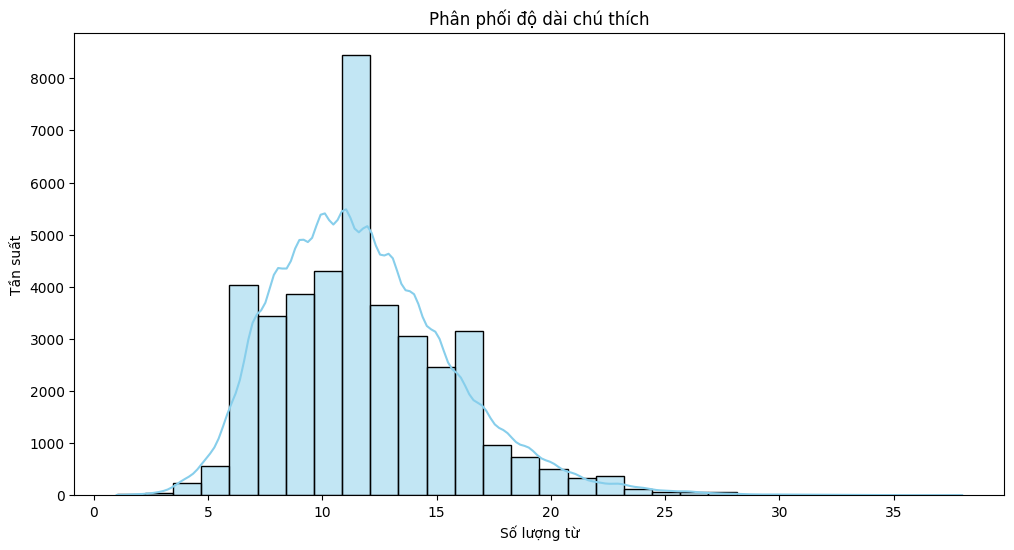

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính độ dài (số từ) của mỗi chú thích
captions_df['caption_length'] = captions_df['caption'].apply(lambda x: len(x.split()))

# Vẽ biểu đồ phân phối độ dài chú thích
plt.figure(figsize=(12, 6))
sns.histplot(captions_df['caption_length'], kde=True, bins=30, color='skyblue')
plt.title('Phân phối độ dài chú thích')
plt.xlabel('Số lượng từ')
plt.ylabel('Tần suất')
plt.show()


Phân tích từ vựng

In [7]:
from collections import Counter

# Ghép tất cả các chú thích thành một chuỗi
all_captions = ' '.join(captions_df['caption'])

# Tách các từ và đếm số lượng từ độc nhất
words = all_captions.split()
unique_words = set(words)
print("Tổng số từ trong toàn bộ dữ liệu:", len(words))
print("Số lượng từ vựng độc nhất:", len(unique_words))


Tổng số từ trong toàn bộ dữ liệu: 476666
Số lượng từ vựng độc nhất: 9631


Tạo biểu đồ tần suất các từ phổ biến nhất

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10188\70093595.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word for word, count in common_words], y=[count for word, count in common_words], palette='viridis')


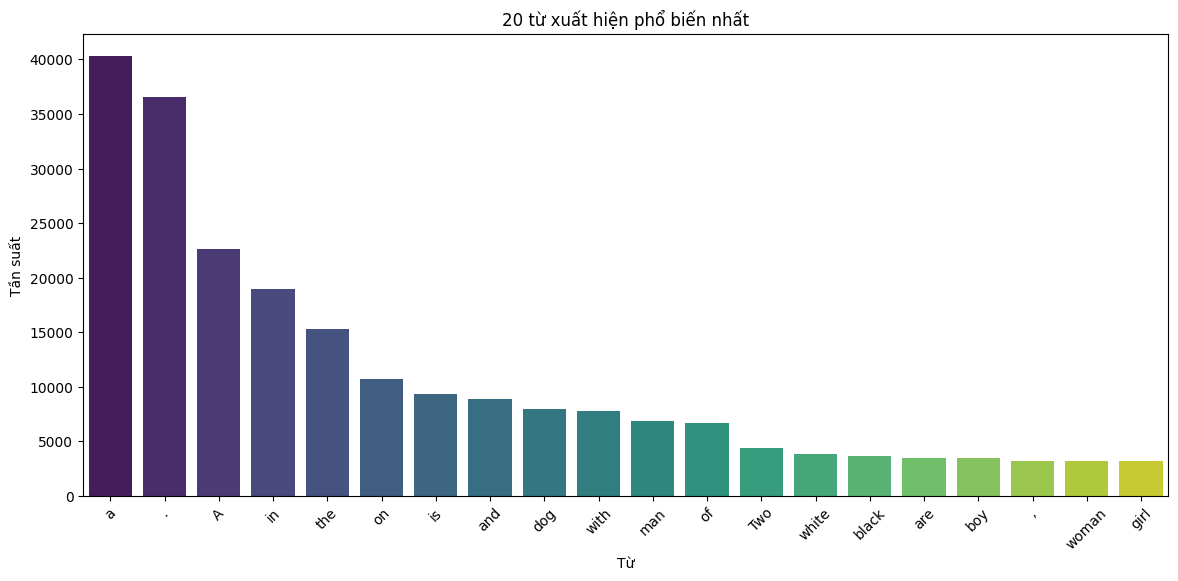

In [8]:
# Đếm tần suất các từ
word_counts = Counter(words)

# Lấy 20 từ phổ biến nhất
common_words = word_counts.most_common(20)

# Tạo biểu đồ thanh
plt.figure(figsize=(14, 6))
sns.barplot(x=[word for word, count in common_words], y=[count for word, count in common_words], palette='viridis')
plt.title('20 từ xuất hiện phổ biến nhất')
plt.xlabel('Từ')
plt.ylabel('Tần suất')
plt.xticks(rotation=45)
plt.show()


3.  Phân Tích Mối Quan Hệ Giữa Ảnh và Chú Thích

So sánh chú thích của cùng một ảnh

In [13]:
# Nhóm các chú thích theo ảnh và xem sự khác biệt
grouped_captions = captions_df.groupby('image')['caption'].apply(list)

# Hiển thị các chú thích của một vài ảnh ngẫu nhiên để kiểm tra sự đa dạng
sample_images = grouped_captions.sample(3)
for image, captions in sample_images.items():
    print(f"Ảnh: {image}")
    for i, caption in enumerate(captions, 1):
        print(f"Chú thích {i}: {caption}")
    print("\n")


Ảnh: 447733067_09cfac3286.jpg
Chú thích 1: A girl in a skimpy bikini outfit walks and carries a helmet .
Chú thích 2: A scantily clad girl , in a helmet , walks away from the camera , down a busy sidewalk .
Chú thích 3: A woman wearing a helmet , tall boots , and short shorts walks down the street .
Chú thích 4: Girl in bikini bottoms , boots and a helmet walking away at a street fair .
Chú thích 5: The woman in the purple bikini and pink top is wearing a safety helmet .


Ảnh: 2926233397_71e617f3a3.jpg
Chú thích 1: A brown dog up to its neck in water
Chú thích 2: A dog is almost all the way in the water and takes a drink .
Chú thích 3: A dog , possibly a basset hound , stands nose-deep in pond water .
Chú thích 4: A large dog wades through shallow water .
Chú thích 5: The brown dog is taking a drink while wading in the water .


Ảnh: 495033548_bd320405d8.jpg
Chú thích 1: Men participate in a soccer game .
Chú thích 2: Two male soccer players in game action .
Chú thích 3: Two men fall 

Kiểm tra tính nhất quán

In [14]:
from collections import defaultdict

# Đếm số lần lặp lại của mỗi chú thích trong toàn bộ tập dữ liệu
caption_counts = defaultdict(int)
for captions in grouped_captions:
    for caption in captions:
        caption_counts[caption] += 1

# Kiểm tra các chú thích xuất hiện nhiều nhất
sorted_caption_counts = sorted(caption_counts.items(), key=lambda x: x[1], reverse=True)
print("Các chú thích lặp lại nhiều nhất:")
for caption, count in sorted_caption_counts[:5]:
    print(f"Chú thích: '{caption}' - Số lần xuất hiện: {count}")


Các chú thích lặp lại nhiều nhất:
Chú thích: 'Two dogs playing in the snow .' - Số lần xuất hiện: 7
Chú thích: 'two dogs play together .' - Số lần xuất hiện: 6
Chú thích: 'A dog runs through the grass .' - Số lần xuất hiện: 6
Chú thích: 'A dog swimming with a stick in its mouth .' - Số lần xuất hiện: 6
Chú thích: 'A person on a bmx bike .' - Số lần xuất hiện: 6


4. Phân Tích Hình Ảnh

Kiểm tra kích thước và định dạng ảnh

In [15]:
import cv2
import numpy as np

# Kiểm tra kích thước của một số ảnh ngẫu nhiên
sample_image_paths = [os.path.join(images_path, image) for image in sample_images.index]
image_shapes = []

for image_path in sample_image_paths:
    image = cv2.imread(image_path)
    if image is not None:
        image_shapes.append(image.shape)

# Hiển thị kích thước các ảnh
print("Kích thước các ảnh ngẫu nhiên:")
for shape in image_shapes:
    print(shape)

# Kiểm tra xem tất cả các ảnh có cùng kích thước hay không
all_shapes = [cv2.imread(os.path.join(images_path, img)).shape for img in image_files]
unique_shapes = set(all_shapes)
print("\nSố lượng kích thước ảnh duy nhất:", len(unique_shapes))
if len(unique_shapes) > 1:
    print("Có sự khác biệt về kích thước giữa các ảnh.")
else:
    print("Tất cả các ảnh có cùng kích thước.")


Kích thước các ảnh ngẫu nhiên:
(333, 500, 3)
(344, 500, 3)
(438, 500, 3)

Số lượng kích thước ảnh duy nhất: 597
Có sự khác biệt về kích thước giữa các ảnh.


Phân tích histogram màu sắc

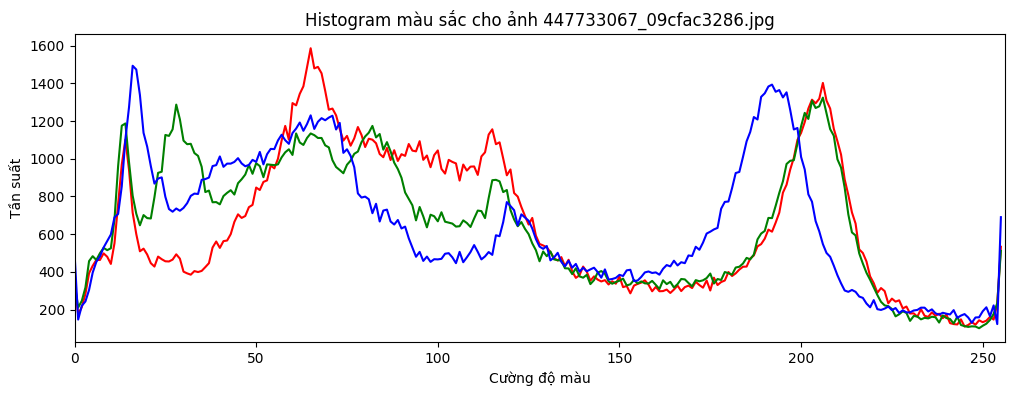

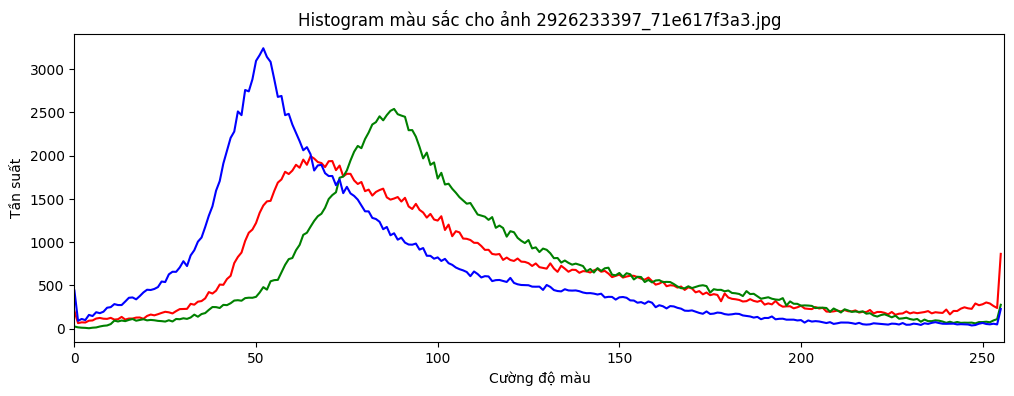

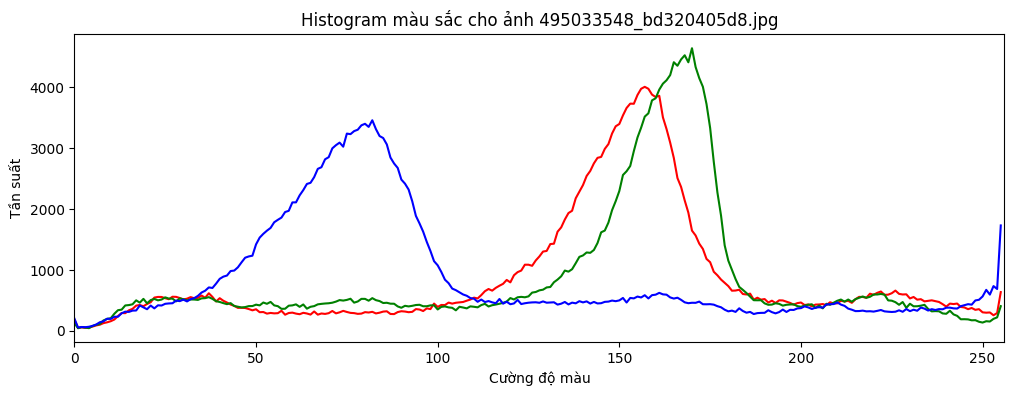

In [16]:
import matplotlib.pyplot as plt

# Vẽ histogram màu sắc cho một số ảnh
for image_path in sample_image_paths[:3]:
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    colors = ('r', 'g', 'b')
    plt.figure(figsize=(12, 4))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title(f"Histogram màu sắc cho ảnh {os.path.basename(image_path)}")
    plt.xlabel('Cường độ màu')
    plt.ylabel('Tần suất')
    plt.show()


Kiểm tra sự đa dạng (độ sáng trung bình và độ tương phản)

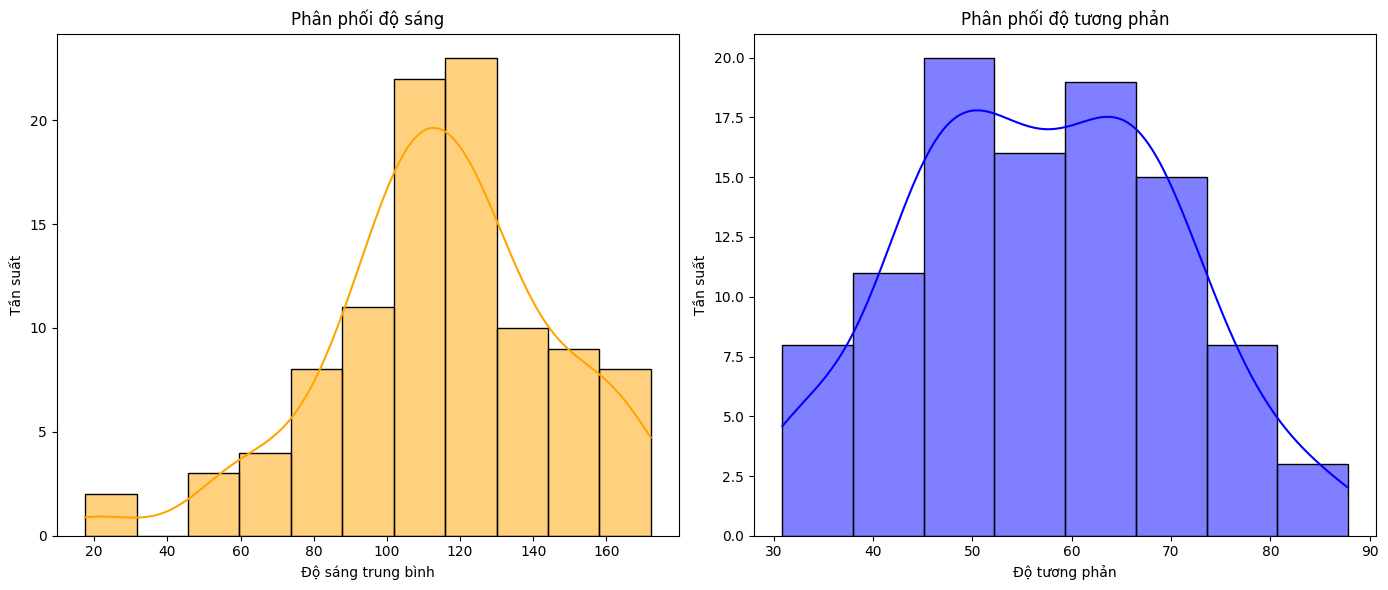

In [17]:
def calculate_brightness_contrast(image):
    # Chuyển đổi ảnh sang grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    brightness = np.mean(gray_image)
    contrast = np.std(gray_image)
    return brightness, contrast

brightness_contrast_values = [calculate_brightness_contrast(cv2.imread(os.path.join(images_path, img))) for img in image_files[:100]]

brightness, contrast = zip(*brightness_contrast_values)

# Vẽ biểu đồ phân phối độ sáng và độ tương phản
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(brightness, kde=True, color='orange')
plt.title('Phân phối độ sáng')
plt.xlabel('Độ sáng trung bình')
plt.ylabel('Tần suất')

plt.subplot(1, 2, 2)
sns.histplot(contrast, kde=True, color='blue')
plt.title('Phân phối độ tương phản')
plt.xlabel('Độ tương phản')
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()


5. Phân Tích Các Vấn Đề Tiềm Ẩn

Dữ liệu thiếu hoặc không đầy đủ

In [18]:
# Kiểm tra các ảnh có bị thiếu chú thích không
missing_captions = len(captions_df['image'].unique()) - len(image_files)
print("Số lượng ảnh thiếu chú thích:", max(0, -missing_captions))

# Kiểm tra có chú thích nào mà không có ảnh tương ứng
missing_images_count = captions_df['image'].apply(lambda x: x not in image_files).sum()
print("Số lượng chú thích không có ảnh tương ứng:", missing_images_count)


Số lượng ảnh thiếu chú thích: 0
Số lượng chú thích không có ảnh tương ứng: 1


Xử lý dữ liệu trùng lặp

In [20]:
# Kiểm tra ảnh bị lặp lại
duplicate_images = captions_df['image'].duplicated().sum()
print("Số lượng ảnh trùng lặp:", duplicate_images)

# Kiểm tra chú thích trùng lặp
duplicate_captions = captions_df.duplicated().sum()
print("Số lượng chú thích trùng lặp:", duplicate_captions)


Số lượng ảnh trùng lặp: 32364
Số lượng chú thích trùng lặp: 10


Phát hiện dữ liệu nhiễu

In [21]:
import re

# Kiểm tra chú thích chứa ký tự đặc biệt không mong muốn
special_char_captions = captions_df['caption'].apply(lambda x: bool(re.search(r'[^a-zA-Z0-9 .,?!\'"]', x))).sum()
print("Số lượng chú thích chứa ký tự đặc biệt:", special_char_captions)


Số lượng chú thích chứa ký tự đặc biệt: 1030


6. Trực Quan Hóa Kết Quả

Biểu đồ hộp cho độ dài chú thích

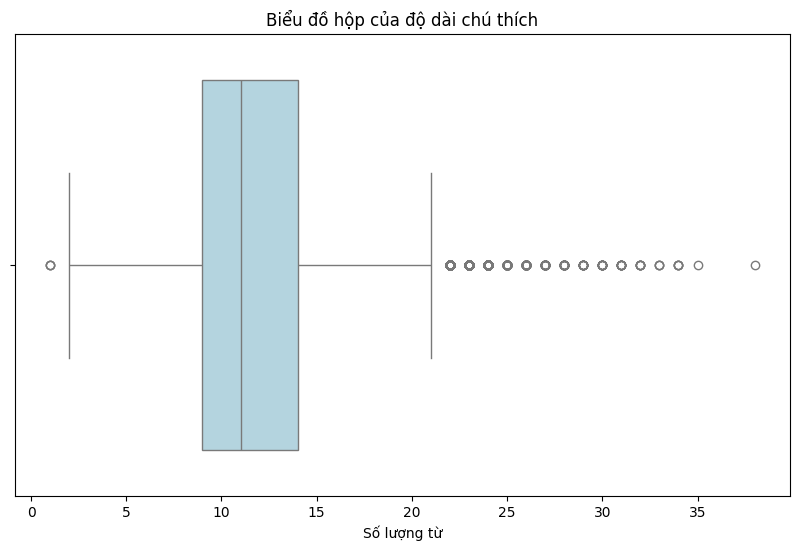

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=captions_df, x='caption_length', color='lightblue')
plt.title('Biểu đồ hộp của độ dài chú thích')
plt.xlabel('Số lượng từ')
plt.show()


Biểu đồ thanh cho từ phổ biến

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10188\1824269872.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word for word, count in common_words], y=[count for word, count in common_words], palette='cool')


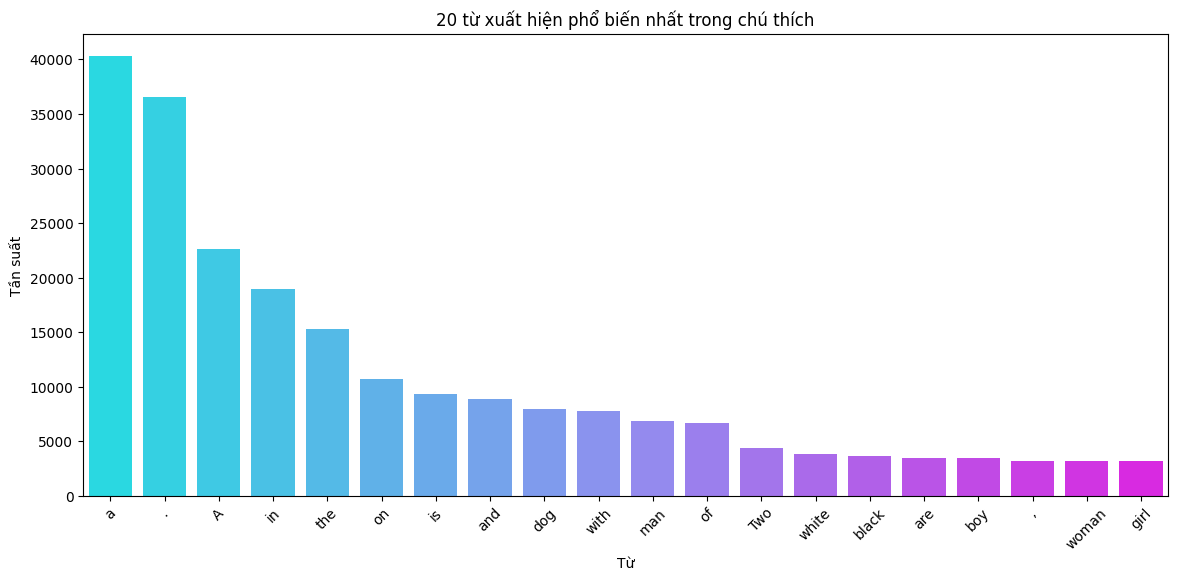

In [23]:
plt.figure(figsize=(14, 6))
sns.barplot(x=[word for word, count in common_words], y=[count for word, count in common_words], palette='cool')
plt.title('20 từ xuất hiện phổ biến nhất trong chú thích')
plt.xlabel('Từ')
plt.ylabel('Tần suất')
plt.xticks(rotation=45)
plt.show()


7. Kết Luận và Đề Xuất

Tóm tắt các điểm quan trọng rút ra từ quá trình EDA:
Dữ liệu đầy đủ: Đa số ảnh đều có chú thích đầy đủ, nhưng cần kiểm tra lại các ảnh thiếu chú thích hoặc ngược lại.
Dữ liệu trùng lặp: Có thể có chú thích hoặc ảnh bị trùng lặp cần loại bỏ.
Dữ liệu nhiễu: Một số chú thích chứa ký tự đặc biệt không mong muốn cần xử lý.

Đề xuất cần thực hiện trong quá trình tiền xử lý:
Loại bỏ dấu câu: Để chuẩn hóa dữ liệu văn bản.
Sửa lỗi chính tả: Đảm bảo các từ được viết đúng, tăng độ chính xác khi sử dụng mô hình học máy.
Chuẩn hóa độ dài chú thích: Loại bỏ hoặc chỉnh sửa các chú thích quá dài hoặc quá ngắn.
Xử lý ảnh không đạt tiêu chuẩn: Đảm bảo ảnh có kích thước phù hợp (ví dụ: 299x299 pixels cho Xception).

II. DATA PRE-PROCESSING

1. Tiền xử lý văn bản

In [34]:
import sys
sys.setrecursionlimit(2000)


In [ ]:
import re
import pickle
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
import nltk

# Tải từ dừng từ nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Hàm tiền xử lý văn bản
def preprocess_text(text):
    # Loại bỏ dấu câu và chuyển thành chữ thường
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Loại bỏ từ dừng
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Giả sử 'captions' là một danh sách các chú thích văn bản
captions = [
    "A dog is running in the field.",
    "The cat is sitting on the mat.",
    # Thêm các chú thích khác vào đây...
]

# Tiền xử lý văn bản
processed_captions = [preprocess_text(caption) for caption in captions]

# Token hóa văn bản và tạo từ điển từ vựng
tokenizer = Tokenizer()
tokenizer.fit_on_texts(processed_captions)
vocab_size = len(tokenizer.word_index) + 1  # Thêm 1 để bao gồm chỉ số cho từ không xác định

# Lưu tokenizer vào file pickle
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)

# In ra một số thông tin kiểm tra
print(f"Vocab size: {vocab_size}")
print("Sample tokenized text:", tokenizer.texts_to_sequences(processed_captions))


2. Tiền xử lý hình ảnh(trích xuất đặc trưng để áp dụng mô hình Xception từ Keras API)

In [ ]:
import os
import numpy as np
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image

# Khởi tạo mô hình Xception đã được huấn luyện trước (pre-trained) trên ImageNet
base_model = Xception(weights='imagenet', include_top=False)

# Loại bỏ lớp phân loại cuối cùng (include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

# Hàm trích xuất đặc trưng từ hình ảnh
def extract_features(img_path):
    # Đọc hình ảnh và thay đổi kích thước sao cho phù hợp với yêu cầu của mô hình Xception
    img = Image.open(img_path)
    img = img.resize((299, 299))  # Xception yêu cầu kích thước đầu vào là 299x299
    
    # Chuyển hình ảnh thành array
    img_array = img_to_array(img)
    
    # Thêm một chiều cho batch size (model cần đầu vào với batch size)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Tiền xử lý ảnh theo yêu cầu của Xception
    img_array = preprocess_input(img_array)
    
    # Trích xuất đặc trưng từ mô hình Xception
    features = model.predict(img_array)
    
    # Chuyển đổi đặc trưng thành vector 2048 chiều (mỗi ảnh sẽ có 2048 đặc trưng)
    features = features.flatten()
    
    return features

# Đường dẫn tới thư mục chứa các hình ảnh
image_directory = "Dataset/Flicker8k_Dataset"
features_list = []

# Lặp qua tất cả hình ảnh trong thư mục và trích xuất đặc trưng
for img_name in os.listdir(image_directory):
    img_path = os.path.join(image_directory, img_name)
    
    if img_path.lower().endswith(('png', 'jpg', 'jpeg')):
        features = extract_features(img_path)
        features_list.append(features)

# Chuyển danh sách các đặc trưng thành mảng numpy
features_array = np.array(features_list)

# Lưu các đặc trưng vào file pickle
with open('image_features.pkl', 'wb') as f:
    pickle.dump(features_array, f)
    
print("Đặc trưng hình ảnh đã được trích xuất và lưu trữ.")
